##TRAFFIC PREDICTOR

###Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

###Data Loading

In [3]:

data = pd.read_csv("/content/traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


###Data Preprocessing

####Extracting Features

In [4]:
data['DateTime'] = pd.to_datetime(data['DateTime'])
# Extract and assign components of the datetime to new columns
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['DayOfMonth'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Second'] = data['DateTime'].dt.second
data['WeekDay'] = data['DateTime'].dt.weekday + 1 # Monday is assigned 1, Tue 2 and so on..

data.head()


,DateTime,Junction,Vehicles,ID,Year,Month,DayOfMonth,Hour,Minute,Second,WeekDay
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,0,0,7
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,0,0,7
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,0,0,7
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,0,0,7
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,0,0,7


#### Dropping Insignificant Features

In [5]:
# Drop ID because it is just for identification purpose and not of use in prediction
# Drop Datetime as we split Date, day, hr, second into different columns
# Drop Minute,Second as it is always 0 because the data is collected at every hour
data = data.drop(['ID', 'DateTime', 'Minute', 'Second'], axis=1)


# Display the first few rows of the dataframe to verify the changes
data.head()


,Junction,Vehicles,Year,Month,DayOfMonth,Hour,WeekDay
0,1,15,2015,11,1,0,7
1,1,13,2015,11,1,1,7
2,1,10,2015,11,1,2,7
3,1,7,2015,11,1,3,7
4,1,9,2015,11,1,4,7


In [6]:
#checking for missing values
print(data.isna().sum()/data.shape[0]*100)


Junction      0.0
Vehicles      0.0
Year          0.0
Month         0.0
DayOfMonth    0.0
Hour          0.0
WeekDay       0.0
dtype: float64


####Data Visualization

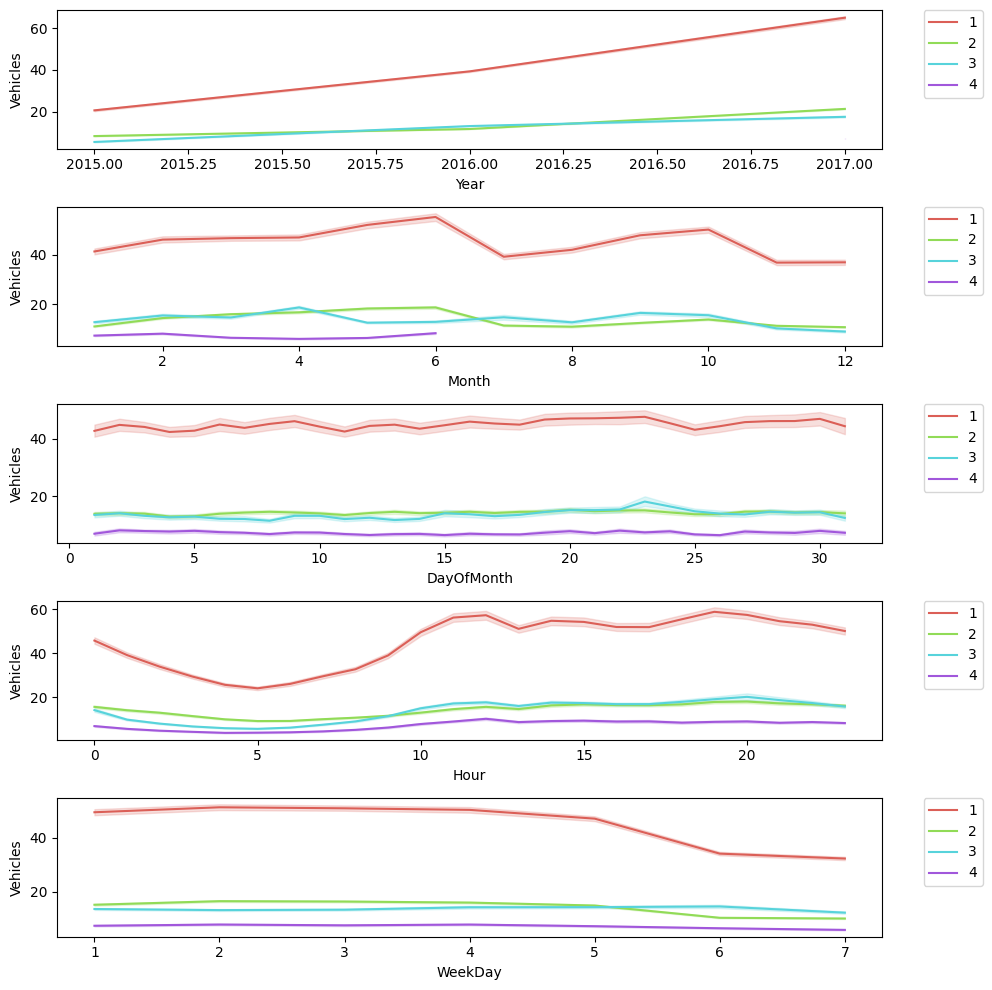

In [7]:
new_features = ["Year", "Month", "DayOfMonth", "Hour", "WeekDay"]
colors = sns.color_palette("hls", n_colors=len(data["Junction"].unique()))

fig, axes = plt.subplots(len(new_features), 1, figsize=(10, len(new_features) * 2))

for i, feature in enumerate(new_features):
    ax = sns.lineplot(x=data[feature], y="Vehicles", data=data, hue="Junction", palette=colors, ax=axes[i])
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()


Text(0.5, 0, 'Date')

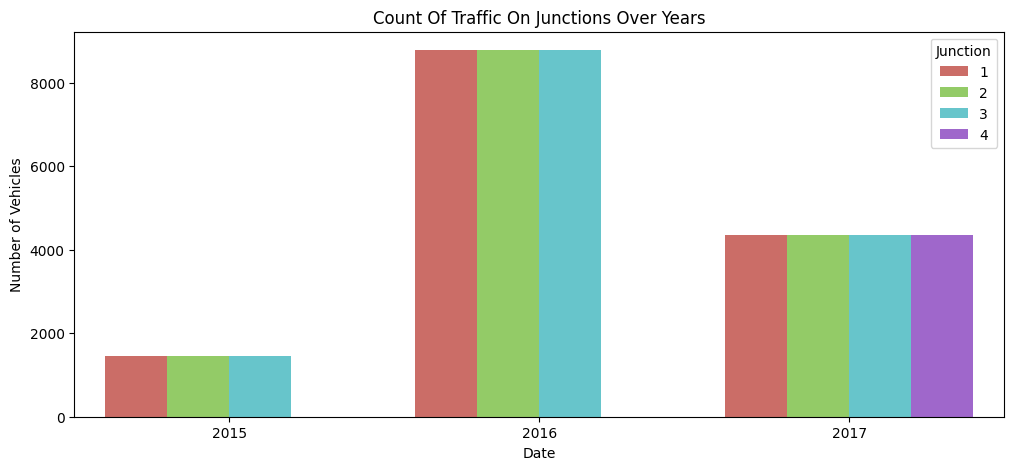

In [8]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=data, x =data["Year"], hue="Junction", palette=colors)
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")


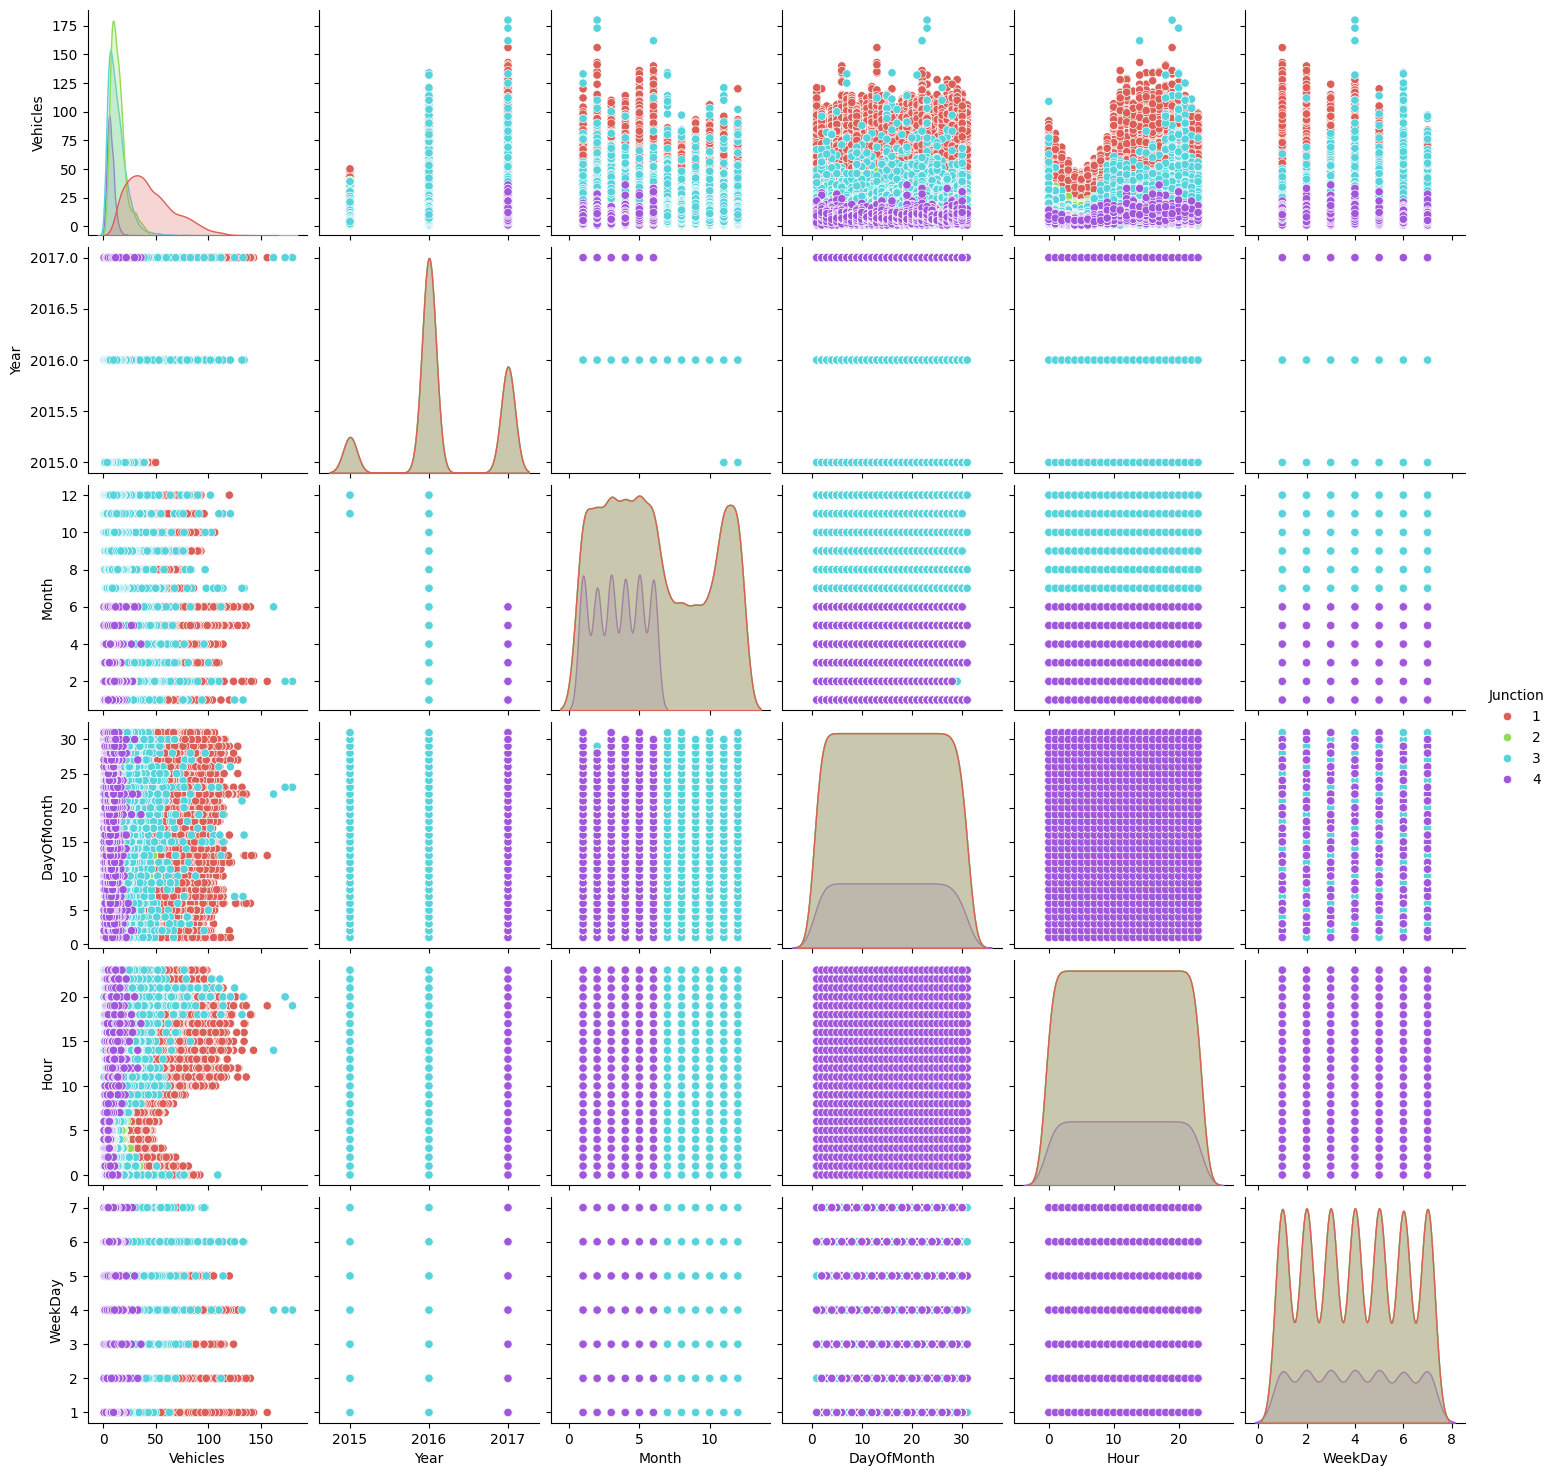

In [9]:
sns.pairplot(data=data, hue= "Junction",palette=colors)


####Splitting the Dataset

In [9]:
# Splitting the data into features (X) and No. of vehicles (y)
X = data.drop('Vehicles', axis=1)
y = data['Vehicles']

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



###Random Forest

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=74)

# Fit the model using the training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)   # ← fixed RMSE
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model Metrics:")
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("Mean Absolute Error:", mae_rf)
print("R-squared Score:", r2_rf)


Random Forest Model Metrics:
Mean Squared Error: 16.750267248545303
Root Mean Squared Error: 4.092709035412279
Mean Absolute Error: 2.4334663341645886
R-squared Score: 0.961129473121528


In [11]:
best_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=4,
    min_samples_leaf=2,
    random_state=74,
    n_jobs=-1
)

best_rf_model.fit(X_train_scaled, y_train)

y_pred_rf = best_rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nFAST Random Forest Model Metrics:")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R²:", r2_rf)



FAST Random Forest Model Metrics:
MSE: 18.221734476945247
RMSE: 4.268692361478542
MAE: 2.4502769506695254
R²: 0.9577147988597021


In [12]:
import joblib
joblib.dump(best_rf_model, "rf_model_best.pkl")


['rf_model_best.pkl']

In [13]:
import numpy as np
import pandas as pd

# 1) Get predictions from Random Forest model
y_all_pred = best_rf_model.predict(X_test_scaled)

# 2) Compute thresholds for 4-level quantization
q1, q2, q3 = np.percentile(y_all_pred, [25, 50, 75])

# 3) Convert continuous predictions to discrete levels 0-3
levels = []
for val in y_all_pred:
    if val <= q1:
        levels.append(0)
    elif val <= q2:
        levels.append(1)
    elif val <= q3:
        levels.append(2)
    else:
        levels.append(3)

levels = np.array(levels, dtype=int)

print("First 20 levels:", levels[:20])
print("Total number of levels:", len(levels))


df_levels = pd.DataFrame({
    "prediction": y_all_pred,
    "level": levels
})

df_levels.to_csv("levels_for_fpga.csv", index=False)
print("levels_for_fpga.csv saved successfully!")


with open("levels.mem", "w") as f:
    for lv in levels:
        f.write(f"{int(lv):X}\n")   # write each level in HEX (same as decimal for 0–3)

print("levels.mem generated successfully!")


First 20 levels: [1 0 2 3 2 0 1 3 2 1 1 0 2 3 2 3 0 3 0 2]
Total number of levels: 9624
levels_for_fpga.csv saved successfully!
levels.mem generated successfully!
